In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
#intial properties and parameters
k_air = 0.032954	  #(0.03095+0.03235)/2 # Thermal conductivity of air
nu =   25.784e-6   #(23.06e-6 + 25.22e-6)/2  # Kinematic Viscocity
alpha =   37.53e-6 #(35.65e-6+32.43e-6)/2   # Thermal diffusivity
beta = 1/398    # Volumetric coeffecient here the temperature is taken as average of surface and ambient in K((225+25)/2)+273
T_dif = 200  #base temp = 225     # Temperature difference between surface and the outside air
Lb = 0.12        # Length of box
W = 0.15         # Width of box
k_al =230 #400  #230       # Thermal conductivity of Aluminium

In [ ]:
Ral = 9.81*beta*T_dif*(Lb**3)/(alpha*nu) # Rayleigh's number
z_opt = Lb*2.714*(Ral**-0.25)            # Optimized value of fin spacing
z_opt

0.005979066535690783

In [ ]:
h = (k_air/Lb)*0.517*(Ral**0.25)
q = h*W*Lb*T_dif
q

27.840538945928987

In [ ]:
Raz = 9.81*beta*T_dif*(z_opt**3)/(alpha*nu)
El = Raz*(z_opt/Lb) # Elenbaas's number
h_z = (k_air/z_opt)*((576/(El**2))+(2.873/(El**0.5)))**-0.5 # Heat transfer coefficient
h_z

7.201582070738843

In [ ]:
def my_function(t):         # This function is created that returns the total power dissipated through fins depending upon the thickness of a fin
    n = W/(z_opt+t)         # Number of fins in a multiple arrayed fin structure
    bo_num = 1.4192*(((k_al*t)/2*h_z)**0.5)
    bo_den = 1-1.125*(h_z/k_al)*(((k_al*t)/2*h_z)**0.5)
    bo = bo_num/bo_den      # Optimum profile length
    At = n*(2*(Lb+t)*bo+(Lb*z_opt)) # Total area of fins
    Af = 2*(Lb+t)*bo        # Area of single fin
    x = bo*((h_z*2*(Lb+t))/(k_al*Lb*t))**0.5  #x = mb, in efficiency
    Effi_f = (np.tanh(x))/x # Efficiency of single fin
    Effi_o = 1-n*(Af/At)*(1-Effi_f)  # Efficiency of arrayed fin structure
    q_total = Effi_o*h_z*At*T_dif  # Net power dissipated through the fins
    return q_total

In [ ]:
from scipy.optimize import minimize

initial_guess = 0.0025
result = minimize(lambda t: -my_function(t), initial_guess, bounds=[(0, None)])
optimal_t = result.x[0]
max_value = -result.fun
print(f"Optimal t: {optimal_t}")      # The value of t for which heat dissipation is maximized
print(f"Maximum value: {max_value}")  #maximum heat dissipation

Optimal t: 0.006503229747805517
Maximum value: 1386.8579773448457


<ipython-input-6-7a182bbbb542>:8: RuntimeWarning: divide by zero encountered in divide
  x = bo*((h_z*2*(Lb+t))/(k_al*Lb*t))**0.5  #x = mb, in efficiency
<ipython-input-6-7a182bbbb542>:8: RuntimeWarning: invalid value encountered in multiply
  x = bo*((h_z*2*(Lb+t))/(k_al*Lb*t))**0.5  #x = mb, in efficiency


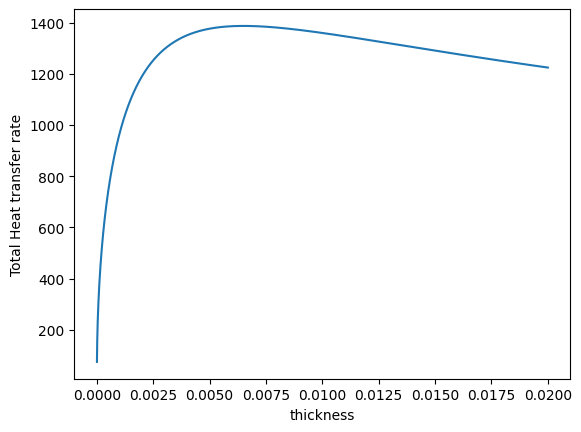

In [ ]:
t = np.linspace(0,0.02,10000) # Plot obtained between net total heat transfered and fin thickness with varying profile length
y = my_function(t)
plt.plot(t,y)
plt.xlabel("thickness")
plt.ylabel("Total Heat transfer rate")
plt.show()

However the above calculations are when there is no restriction on the profile lenght(b). But as per problem statement we want to restrict profile lenght to 19mm

In [ ]:
def qtotal_cstr(t,b):   #considering two parameters rather than one
    n = W/(z_opt+t)
    # bo_num = 1.4192*((k_al*t)/2*h_z)**0.5
    # bo_den = 1-1.125*(h_z/k_al)*((k_al*t)/2*h_z)**0.5
    # bo = bo_num/bo_den
    # here we are considering a fuxed profile length of 19mm  and not the optimized length
    bo = b
    At = n*(2*(Lb+t)*bo+(Lb*z_opt))
    Af = 2*(Lb+t)*bo
    x = bo*((h_z*2*(Lb+t))/(k_al*Lb*t))**0.5
    Effi_f = (np.tanh(x))/x
    Effi_o = 1-n*(Af/At)*(1-Effi_f)
    q_total = Effi_o*h_z*At*T_dif
    return q_total

In [ ]:
initial_guess = 0.0005
maxx = 0
topt = 0
b_crst = 0
for i in np.linspace(0,0.019,1000):
    result = minimize(lambda t: -qtotal_cstr(t,i), initial_guess, bounds=[(0, None)])
    optimal_t = result.x[0]
    max_value = -result.fun
    if(max_value>maxx):
      maxx = max_value
      topt = optimal_t
      b_crst = i
print(f"Optimal t: {optimal_t}")
print(f"Maximum value: {max_value}")
print(b_crst, "Profile Length with max heat dissipation")

<ipython-input-9-e31d9da12819>:11: RuntimeWarning: invalid value encountered in divide
  Effi_f = (np.tanh(x))/x
<ipython-input-9-e31d9da12819>:10: RuntimeWarning: divide by zero encountered in divide
  x = bo*((h_z*2*(Lb+t))/(k_al*Lb*t))**0.5


Optimal t: 0.00019941232679226726
Maximum value: 179.0237654054285
0.019 Profile Length with max heat dissipation


<ipython-input-9-e31d9da12819>:10: RuntimeWarning: divide by zero encountered in divide
  x = bo*((h_z*2*(Lb+t))/(k_al*Lb*t))**0.5


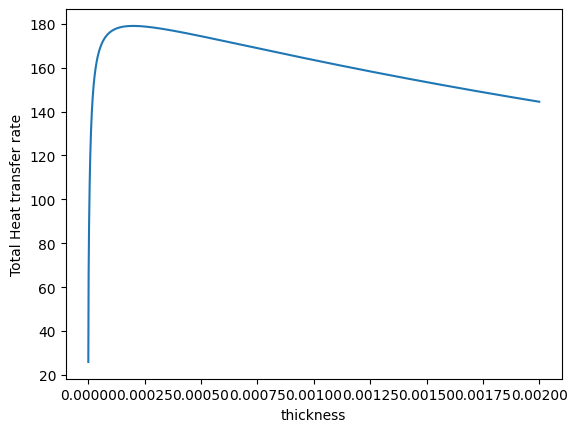

In [ ]:
t = np.linspace(0,0.002,3000)  # Here we are plotting power dissipated through fins with constant profile length of 19 mm
y = qtotal_cstr(t,0.019)

plt.plot(t,y)
plt.xlabel("thickness")
plt.ylabel("Total Heat transfer rate")
plt.show()

In [ ]:
n = W/(z_opt+0.00015163511257545523)

In [ ]:
n

24.467020025745338

In [ ]:
z_opt

0.005979066535690783